<a href="https://colab.research.google.com/github/stepanmouratoglou-a11y/ML-journey/blob/main/Energy_Consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Dataset


In [2]:
dataset=pd.read_csv('building_energy_data.csv')
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [3]:
print(X)

[[19.36350297 49.68177601 54.        ]
 [33.76785766 53.67178297 95.        ]
 [28.29984855 72.72736966 35.        ]
 ...
 [18.19607095 77.33539575 25.        ]
 [30.39363452 49.87439962  4.        ]
 [24.93280946 40.8570202  92.        ]]


In [4]:
print(y)

[242.19180976 397.71115835 149.45821789 ... 117.62097423  73.99224069
 356.21955713]


# Relation between Occupants and Energy Consumption

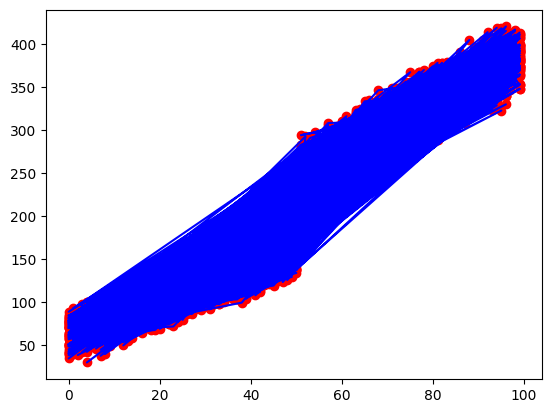

In [5]:
plt.scatter(dataset['Occupants'],y,color='red')
plt.plot(dataset['Occupants'],y,color='blue')
plt.show()

Training & Test Set

In [6]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

Linear Regression Model

In [7]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)

In [8]:
from sklearn.tree import DecisionTreeRegressor
regressor_tree=DecisionTreeRegressor(random_state=42)
regressor_tree_2=DecisionTreeRegressor(random_state=42)
regressor_tree.fit(X_train,y_train)
regressor_tree_2.fit(X_train,y_train)
y_pred_tree_test=regressor_tree.predict(X_test)
y_pred_tree=regressor_tree_2.predict(X)

Comparison Between the Regressors and the Real values

In [9]:
print('Linear , DesicionTreeregressor , Y_test')
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_pred_tree_test.reshape(len(y_pred_tree_test),1),y_test.reshape(len(y_test),1)),1))

Linear , DesicionTreeregressor , Y_test
[[288.71587131 290.72299224 297.33649708]
 [209.9545033  217.99908163 230.78328571]
 [243.67660165 266.22666076 262.97707751]
 ...
 [330.85758683 331.5206356  332.39251162]
 [ 59.27574107  75.22259564  67.74054134]
 [211.47977992 168.00363226 158.48518998]]


Visualisation Desicion Tree Regressor

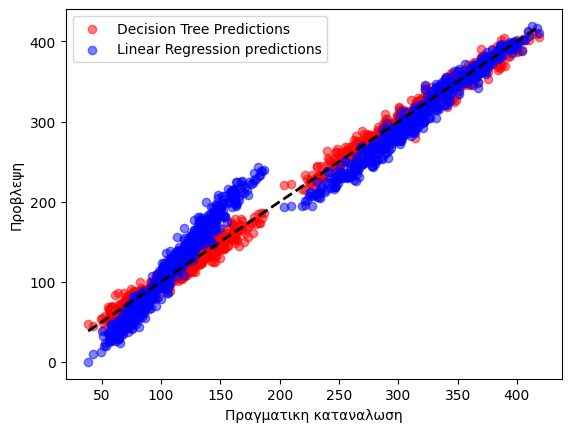

In [10]:

plt.figure()
plt.scatter(y_test, y_pred_tree_test, color='red', alpha=0.5, label='Decision Tree Predictions')
plt.scatter(y_test,y_pred,color='blue',alpha=0.5, label='Linear Regression predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Πραγματικη καταναλωση')
plt.ylabel('Προβλεψη')
plt.legend()
plt.show()

In [11]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print('Metrics for the linear regression model')
print('R2 score: ',r2_score(y_test,y_pred))
print('MAE: ',mean_absolute_error(y_test,y_pred))
print('MSE: ',mean_squared_error(y_test,y_pred))
print()
print('Metrics for the decision tree regression model')
print('R2 score: ',r2_score(y_test,y_pred_tree_test))
print('MAE: ',mean_absolute_error(y_test,y_pred_tree_test))
print('MSE: ',mean_squared_error(y_test,y_pred_tree_test))

Metrics for the linear regression model
R2 score:  0.9575478844960176
MAE:  18.186545210450525
MSE:  509.50218965215805

Metrics for the decision tree regression model
R2 score:  0.9943047264334118
MAE:  6.569783686094232
MSE:  68.35358658563196
